#### Rommel Fernandes 
#### ELEC 699 - Deep Learning
#### Project 1
#### 10/3/2018

## PREPARING THE DATA
Here we are going to be importing the data to see how it relates to the target we are trying to predict. We will take a look at missing data and figure out what is the best way to keep the most data that we can while building an effective model. 

In [38]:
import pandas as pd   # Import pandas for data anaylsis 
import numpy as np
import math 

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows',500)
pd.set_option('display.max_colwidth',500)

data = pd.read_excel('resd_data.xlsx')

In [39]:
data.dtypes

SquareFootageStructure    float64
LotSquareFootage          float64
YearBuilt                 float64
Bedrooms                  float64
BathsTotal                float64
field_StoriesTotal        float64
field_PostalCode          float64
ListPrice                 float64
dtype: object

### Describe initial Summary Statistics 

In [40]:
data.describe()

SquareFootageStructure  LotSquareFootage    YearBuilt     Bedrooms  \
count             9998.000000      9.998000e+03  9411.000000  9998.000000   
mean              1931.688038      2.087269e+05  1975.571246     2.914183   
std               1993.506568      5.383501e+06    83.226601     1.463516   
min                  0.000000      0.000000e+00     0.000000     0.000000   
25%               1143.000000      5.000000e+03  1960.000000     2.000000   
50%               1650.000000      7.405000e+03  1981.000000     3.000000   
75%               2427.000000      1.395050e+04  2001.000000     4.000000   
max              86448.000000      3.310560e+08  2018.000000    17.000000   

        BathsTotal  field_StoriesTotal  field_PostalCode     ListPrice  
count  9998.000000         6812.000000       9870.000000  9.998000e+03  
mean      2.483097            1.766882      91874.970719  7.962502e+05  
std       1.487255            2.453856       2298.199067  1.559266e+06  
min       0.000000            0.000000          0.000000  0.000000e+00  
25%       2.000000            1.000000      91007.000000  2.100000e+05  
50%       2.000000            1.000000      92253.000000  4.598500e+05  
75%       3.000000            2.000000      92627.000000  8.296218e+05  
max      25.000000           65.000000      99999.000000  5.100000e+07

In [41]:
# Modify Data  (Filter for following data only)

data = data[(data['field_StoriesTotal'] <= 4)]   #only homes with less than 4 floors
data = data[(data['SquareFootageStructure'] > 100) & (data['SquareFootageStructure'] <= 6000) ] # Homes between 100 & 6000 sqft
data = data[(data['BathsTotal'] <= 10)]   # less than or equal to 10 baths
data = data[(data['Bedrooms'] <= 10)]     # less than or equal to 10 bedrooms
data = data[(data['ListPrice'] > 50000) &  (data['ListPrice'] <= 30000000) ]     # between 50 thousand and 3 million dollars 

### Visualzing the missing data 

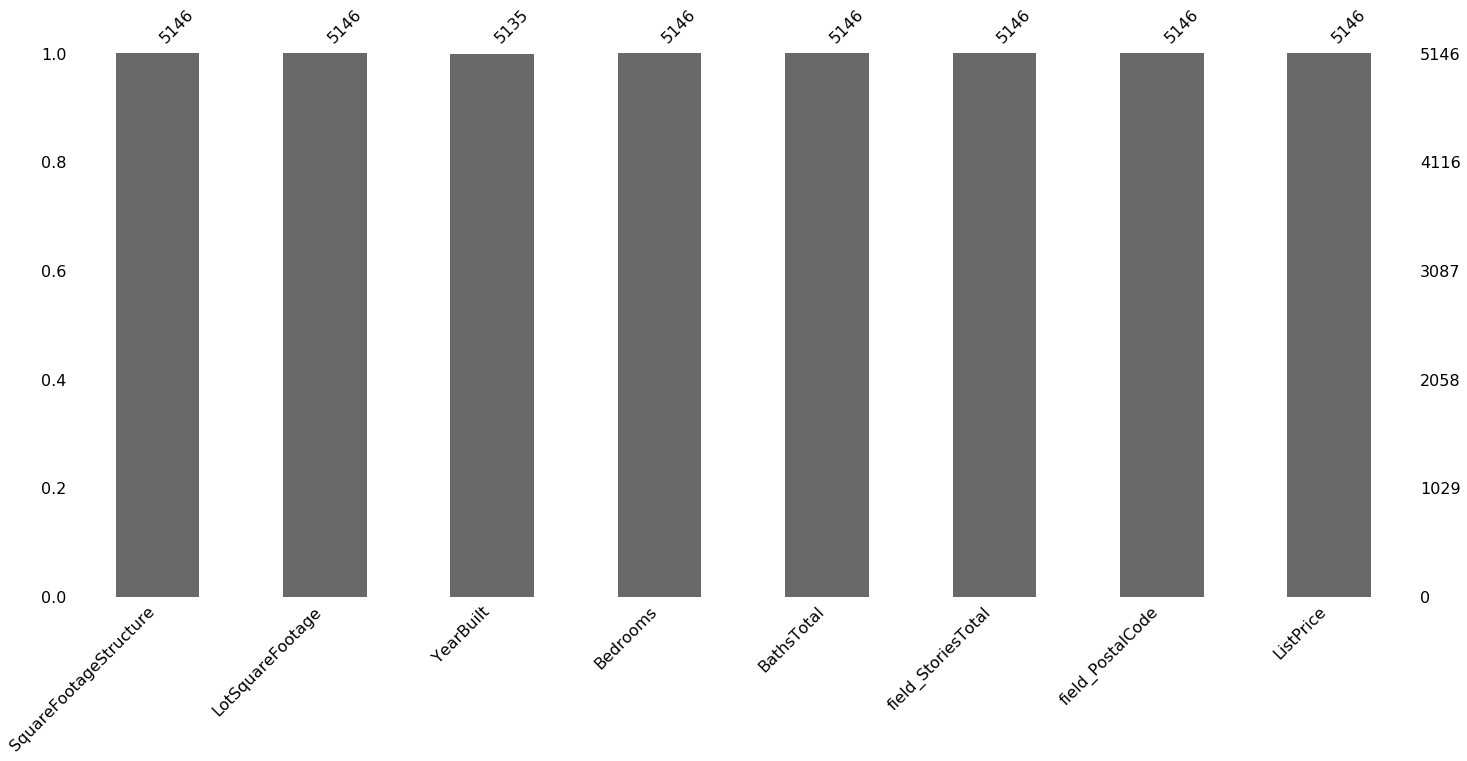

In [42]:
import missingno as msno
import matplotlib.pyplot as plt
msno.bar(data)
plt.show()

In [43]:
data = data[~data.SquareFootageStructure.isnull()]

In [44]:
data = data[np.isfinite(data['field_PostalCode'])]

### Replacing Missing Data with Averages
In this example, I noticed there is a lot of missing data for **field_StoriesTotal** and **YearBuilt** columns. Instead of deleting these rows that have missing data the following two functions take the average value of the zip code for those respective fields and imputes the average for the missing data. 

In [45]:
## Average Stories Total Per Zip Code
def stories_fill(x, y):
    if math.isnan(x):
        x = data[data['field_PostalCode'] == y]['field_StoriesTotal'].mean()
    return x

data['field_StoriesTotal'] = data.apply(lambda x: stories_fill(x['field_StoriesTotal'], x['field_PostalCode']), axis=1)


In [46]:
## Average year built Per Zip Code
def year_fill(x, y):
    if math.isnan(x) or x == 0:
        x = data[data['field_PostalCode'] == y]['YearBuilt'].mean()
    return x

data['YearBuilt'] = data.apply(lambda x: year_fill(x['YearBuilt'], x['field_PostalCode']), axis=1)

### Visualizing data again to see missing colums

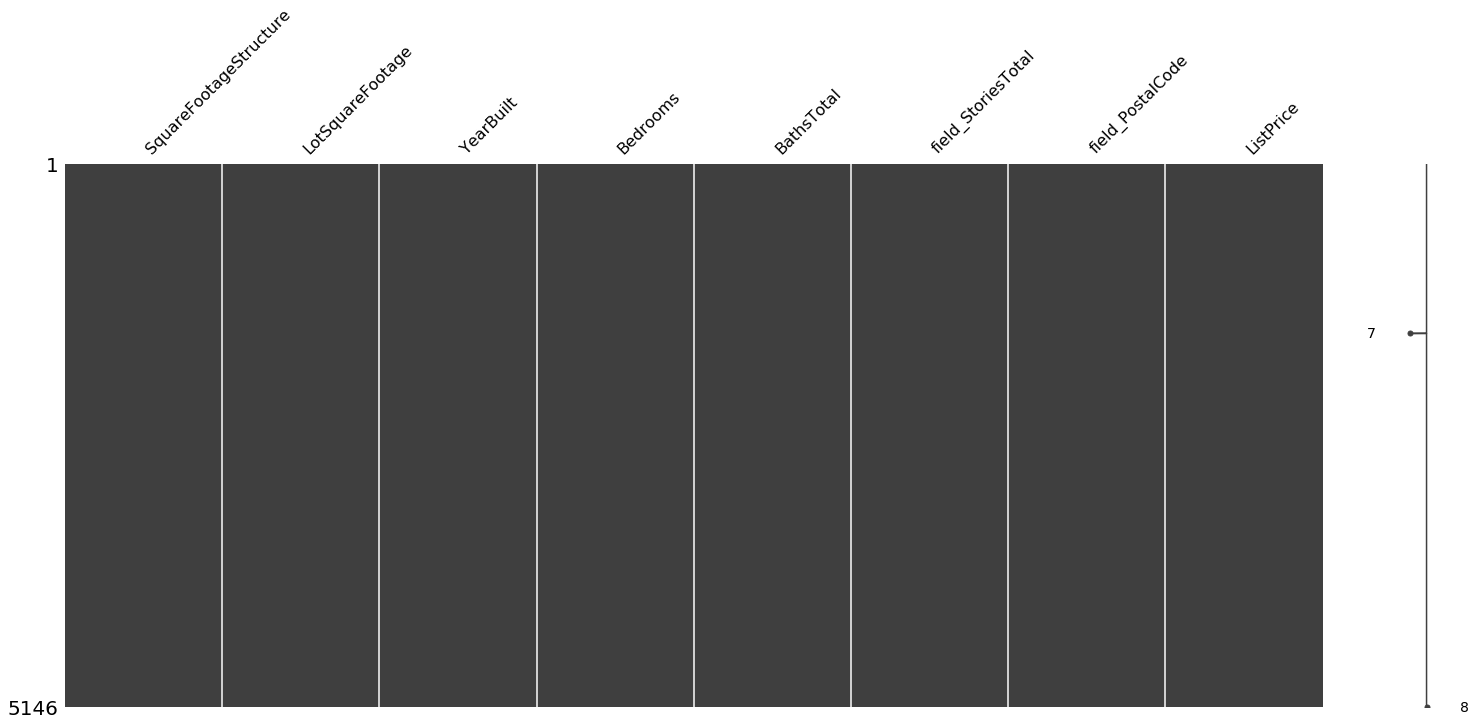

In [47]:
msno.matrix(data)
plt.show()

### Finding correlations with the data
In order to build a good regression model, you have to understand how the data interacts with each other. In this case the simplest way to see that is create a correleation diagram. Here a heatmap is shown to identify which data strongly correlates with the list prices, and which data strongly correlates with each other. Using this information we can create a regression model with only the variables of importance. 

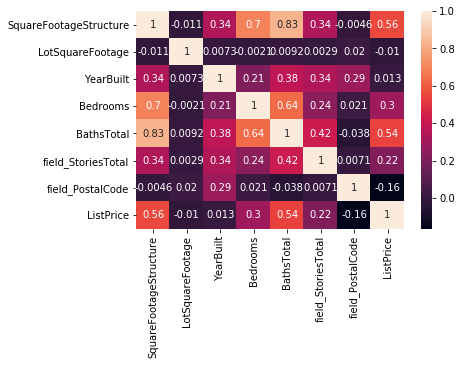

In [48]:
# library & dataset
import seaborn as sns

corr = data.corr()
corr.style.background_gradient().set_precision(2)  # Create correlation diagram 

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,annot=True)
plt.show()

Looking at the data, it looks like Baths and Bedrooms have the higest correleation between variables. Then Square Footage and
and Baths.

- Baths
- Bedrooms 
- Square Footage 

### Final Adjustment to Data Set
Finally we adjust the values for the data set, I noticed some specific zip codes that were not neccesarily part of California or actual zip codes in the data set. We eliminated these rows from the dataset so that there is no bias with the data

In [49]:
zip_codes = list(data['field_PostalCode'].unique())
zip_codes.sort()
non_zip = [0, 11100,11827,99999, 2270]
data = data[~data['field_PostalCode'].isin(non_zip)]
data.dropna(inplace=True)

Out of **10,000** intial records, we ended up having **5,144** records after cleaning and preparing the data. 

In [50]:
data.shape

(5144, 8)

In [51]:
data.head()

SquareFootageStructure  LotSquareFootage  YearBuilt  Bedrooms  BathsTotal  \
3                   3884.0           16013.0     1978.0       3.0         3.0   
6                   1164.0            6611.0     1961.0       3.0         2.0   
12                  2766.0            7331.0     1986.0       4.0         3.0   
14                  3339.0           20473.0     2001.0       4.0         4.0   
16                  1400.0            7728.0     1910.0       4.0         2.0   

    field_StoriesTotal  field_PostalCode  ListPrice  
3                  1.0           90274.0  2599000.0  
6                  1.0           91732.0   499999.0  
12                 2.0           91750.0   929800.0  
14                 1.0           92508.0   689900.0  
16                 1.0           92401.0   245000.0

In [52]:
data.dtypes

SquareFootageStructure    float64
LotSquareFootage          float64
YearBuilt                 float64
Bedrooms                  float64
BathsTotal                float64
field_StoriesTotal        float64
field_PostalCode          float64
ListPrice                 float64
dtype: object

In [53]:
data['field_PostalCode'] = data['field_PostalCode'].apply(lambda x: str(round(x)))

In [54]:
data['YearBuilt'] = data['YearBuilt'].apply(lambda x: str(round(x)))

In [55]:
data.head()

SquareFootageStructure  LotSquareFootage YearBuilt  Bedrooms  BathsTotal  \
3                   3884.0           16013.0      1978       3.0         3.0   
6                   1164.0            6611.0      1961       3.0         2.0   
12                  2766.0            7331.0      1986       4.0         3.0   
14                  3339.0           20473.0      2001       4.0         4.0   
16                  1400.0            7728.0      1910       4.0         2.0   

    field_StoriesTotal field_PostalCode  ListPrice  
3                  1.0            90274  2599000.0  
6                  1.0            91732   499999.0  
12                 2.0            91750   929800.0  
14                 1.0            92508   689900.0  
16                 1.0            92401   245000.0

## RUNNING INTIAL MLP MODEL 

We are now ready to run the inial MLP neural network model. Based on prior data and the correlation matrix, we now subset the data that would best fit the model. In our case we saw that **YearBuilt** and **field_PostalCode** are more categorical in nature. For the sake of the regession model, we want contionous variables in order to predict the values. So converted the categorical variables into **One-Hot Encoded variables**

In [56]:
from keras import models
from keras import layers
import tensorflow as tf
from sklearn.model_selection import train_test_split

# drop columns like zip code and year, because they have no significant relationtion to ListPrice 
data1 = data[['SquareFootageStructure' ,'LotSquareFootage' ,  'Bedrooms' , 'BathsTotal', 'field_StoriesTotal', 
              'YearBuilt','field_PostalCode', 'ListPrice']]

# Categorical Data 
data_hot = data1.loc[:, 'YearBuilt':'field_PostalCode']
data_dummies = pd.get_dummies(data_hot)


# continous data 
data_reg = data1.loc[:, 'SquareFootageStructure':'field_StoriesTotal']


#Make the contious data normalized around the mean 
mean = data_reg.mean(axis=0)
data_reg -= mean
std = data_reg.std(axis=0)
data_reg /= std


# Combine One Hot encoded variables and Target Variables into one data frame 
data_comp = data_reg.join(data_dummies)
target = pd.DataFrame(data1['ListPrice'])
data_comp = data_comp.join(target)


# Split data into train test split 
train, test = train_test_split(data_comp, test_size=0.2)
train_labels = pd.DataFrame(train['ListPrice'])
test_labels =  pd.DataFrame(test['ListPrice'])

train_data = train.loc[:, train.columns != 'ListPrice'] # all the columns but the target column
test_data = test.loc[:, test.columns != 'ListPrice']  # all the colunmns but the training column

In [57]:
print(test_data.shape)
print(train_data.shape)

(1029, 726)
(4115, 726)


#### Build Layer model 

In [58]:
### Build Model 

num_epochs = 1000

# Two layers with one fully connected model 
def build_model():
    model = models.Sequential()                                  
    model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))   
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1)) # FC layer that outputs the value 
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

#### Using Traing and Split test for results 

In [59]:
model = build_model()                                                    
model.fit(train_data, train_labels, epochs=num_epochs, batch_size=2000, verbose=0)
val_mse, val_mae = model.evaluate(test_data, test_labels, verbose=0)      
    
print('MAE: ' + str(val_mae))
print('MSE: ' + str(val_mse))

MAE: 650828.7401603499
MSE: 1120704029698.9854


#### Using K-Fold Validataion for results 

In [60]:
## K- Fold Validaiton 

k = 5
num_val_samples = len(train_data) // k
all_scores = []
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]    
    val_targets = train_labels[i * num_val_samples: (i + 1) * num_val_samples]

    partial_train_data = np.concatenate(                                     
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_labels[:i * num_val_samples],
         train_labels[(i + 1) * num_val_samples:]],
        axis=0)

    model = build_model()                                                   
    model.fit(partial_train_data, partial_train_targets,                     
              epochs=num_epochs, batch_size=2000, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)      
    all_scores.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
processing fold # 4


In [61]:
np.mean(all_scores)

822395.1378797084

## MODEL FOR HIGHEST CORRELATION DATA 

As we saw identified earlier , the stronngest correlations between the List Price were **SquareFootageStructure**, **Bedrooms**, **BathsToal**. This portion of the code subsets the data such that we only use those varibles to run the model to preduct the **ListPrice**. This also includes the **One-Hot Encoded** Zip Code and Year Data.

In [62]:
data1 = data[['SquareFootageStructure'  , 'Bedrooms' , 'BathsTotal', 
              'YearBuilt','field_PostalCode', 'ListPrice']]

# Categorical Data 
data_hot = data1.loc[:, 'YearBuilt':'field_PostalCode']
data_dummies = pd.get_dummies(data_hot)


# continous data 
data_reg = data1.loc[:, 'SquareFootageStructure':'BathsTotal']


#Make the contious data normalized around the emean 
mean = data_reg.mean(axis=0)
data_reg -= mean
std = data_reg.std(axis=0)
data_reg /= std


# Combine One Hot encoded variables and Target Variables into one data frame 
data_comp = data_reg.join(data_dummies)
target = pd.DataFrame(data1['ListPrice'])
data_comp = data_comp.join(target)


# Split data into train test split 
train, test = train_test_split(data_comp, test_size=0.2)
train_labels = pd.DataFrame(train['ListPrice'])
test_labels =  pd.DataFrame(test['ListPrice'])

train_data = train.loc[:, train.columns != 'ListPrice'] # all the columns but the target column
test_data = test.loc[:, test.columns != 'ListPrice']  # all the colunmns but the training column

In [63]:
# Run the model with num epochs 

model = build_model()                                                    
model.fit(train_data, train_labels, epochs=num_epochs, batch_size=2000, verbose=0)
val_mse, val_mae = model.evaluate(test_data, test_labels, verbose=0)      
    
print('MAE: ' + str(val_mae))
print('MSE: ' + str(val_mse))

MAE: 723506.0062560738
MSE: 1821479510533.4734


## MODEL WITH NEW ZIP CODE DATA INFORMATION ( API )
This API is provided as a python library called **uszipcode**. This pulls information like **median home value**, **population density**, **etc**. and joins it with the existing data that we have. We then use it in the model to create additional features and see if it becomes a better predictor of ListPrice 

In [64]:
import collections
from uszipcode import SearchEngine

# Pull API DATA from Search 
search = SearchEngine(simple_zipcode=True)

def updated_dict(zip_dict):
    new_dict = {}
    new_dict['housing_units'] = zip_dict['housing_units']
    new_dict['median_home_value'] = zip_dict['median_home_value']
    new_dict['median_household_income'] = zip_dict['median_household_income']
    new_dict['occupied_housing_units'] = zip_dict['occupied_housing_units']
    new_dict['population'] = zip_dict['population']
    new_dict['population_density'] = zip_dict['population_density']
    new_dict['state'] = zip_dict['state']
    new_dict['zipcode'] = zip_dict['zipcode']
    return new_dict


zc_list = list(data['field_PostalCode'].unique())


# Create dataframe of aggreage zip code data 
appended_data = []
for zc in zc_list:
    val = str(int(zc))
    zipcode = search.by_zipcode(val)
    zip_dict = zipcode.to_dict()
    new_dict = updated_dict(zip_dict)
    od = collections.OrderedDict(sorted(new_dict.items()))
    df = pd.DataFrame(od, index = [0])
    # store DataFrame in list
    appended_data.append(df)
# see pd.concat documentation for more info
zip_code_data = pd.concat(appended_data, axis= 0)
zip_code_data = zip_code_data.reset_index(drop=True)

In [65]:
zip_code_data.head()

housing_units median_home_value median_household_income  \
0          9941           1000001                  151469   
1         15347            340600                   42465   
2         12396            454500                   79140   
3         10351            319100                  100243   
4           748             28800                   14946   

  occupied_housing_units population  population_density state zipcode  
0                   9479      25209              2106.0    CA   90274  
1                  14700      61386             13301.0    CA   91732  
2                  11944      33249              1318.0    CA   91750  
3                   9945      35000              3262.0    CA   92508  
4                    651       1932              2235.0    CA   92401

In [66]:
zip_code_data.to_csv('zip_code_data.csv')

In [67]:
zip_code_data.dtypes

housing_units               object
median_home_value           object
median_household_income     object
occupied_housing_units      object
population                  object
population_density         float64
state                       object
zipcode                     object
dtype: object

#### Join Old Dataset with new zipcode Dataset 

In [68]:
data2 = data

In [69]:
data3 = pd.merge(data,zip_code_data, how = 'inner', left_on = 'field_PostalCode', right_on ='zipcode')

In [70]:
data4 = data3.drop('zipcode', 1)
data4['housing_units'] = data4['housing_units'].astype(float)
data4['median_home_value'] = data4['median_home_value'].astype(float)
data4['median_household_income'] = data4['median_household_income'].astype(float)
data4['occupied_housing_units'] = data4['occupied_housing_units'].astype(float)
data4['population'] = data4['population'].astype(float)

In [71]:
data4.dtypes

SquareFootageStructure     float64
LotSquareFootage           float64
YearBuilt                   object
Bedrooms                   float64
BathsTotal                 float64
field_StoriesTotal         float64
field_PostalCode            object
ListPrice                  float64
housing_units              float64
median_home_value          float64
median_household_income    float64
occupied_housing_units     float64
population                 float64
population_density         float64
state                       object
dtype: object

#### Identify Highest Correlation with new Variables 

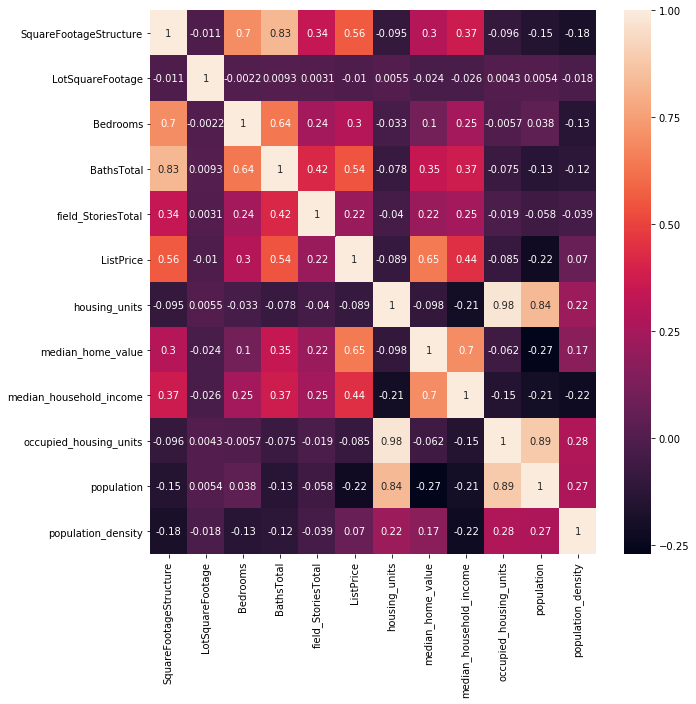

In [72]:
corr = data4.corr()
corr.style.background_gradient().set_precision(2)  # Create correlation diagram 
fig, ax = plt.subplots(figsize=(10,10))   


# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,annot=True)
plt.show()

#### Run model with new varibles that were identifeid

In [73]:
# Gather the meaningful continous data from the correlations 

data5 = data4[['SquareFootageStructure', 'Bedrooms','BathsTotal', 'field_StoriesTotal', 'housing_units',
              'median_home_value', 'median_household_income' , 'occupied_housing_units', 'population',
              'population_density', 'YearBuilt','field_PostalCode','ListPrice']]


# Categorical Data 
data_hot = data5.loc[:, 'YearBuilt':'field_PostalCode']
data_dummies = pd.get_dummies(data_hot)


# continous data 
data_reg = data5.loc[:, 'SquareFootageStructure':'population_density']


#Make the contious data normalized around the emean 
mean = data_reg.mean(axis=0)
data_reg -= mean
std = data_reg.std(axis=0)
data_reg /= std


# Combine One Hot encoded variables and Target Variables into one data frame 
data_comp = data_reg.join(data_dummies)
target = pd.DataFrame(data5['ListPrice'])
data_comp = data_comp.join(target)


# Split data into train test split 
train, test = train_test_split(data_comp, test_size=0.2)
train_labels = pd.DataFrame(train['ListPrice'])
test_labels =  pd.DataFrame(test['ListPrice'])

train_data = train.loc[:, train.columns != 'ListPrice'] # all the columns but the target column
test_data = test.loc[:, test.columns != 'ListPrice']  # all the colunmns but the training column

In [74]:
# Run the model 

model = build_model()                                                    
model.fit(train_data, train_labels, epochs=num_epochs, batch_size=2000, verbose=0)
val_mse, val_mae = model.evaluate(test_data, test_labels, verbose=0)      
    
print('MAE: ' + str(val_mae))
print('MSE: ' + str(val_mse))

MAE: 608186.1352630286
MSE: 820839395348.1377


## SUMMARY 
In summary, I primarily focused on cleaning the data as much as possible in order to run the model. If I had dropped the data that had no values, I would only be left with **6000** records to do a train test split. Having more than 9000 records to train and test allows me to have a more granular model. 

As for the model itself. I stuck with running a  2 layer deep learning neural network model, with 1 fully connected output. I didnt change the variables of the model input at all since, i wanted to have some consistency in the overall training and testing process. Overall, I tested 4 scenarios with my model. The first two scenarios was the **orginal housing dataset with all variables except zipcode and year built**, one for train test split and the other with k-fold validation. The third model consited of **only highly correlated variables with ListPrice**. The fourth model was introducing **new varibles from APIs that related to the zip code**.

Overall when introducing other vairables such as **median housing income** and **median home value** increase the accuracy fo the model. However the MAE for all the run models are still rellatively high. 